## Functional API in Keras

In [1]:
# Import some useful packages
import matplotlib.pyplot as plt
import numpy as np

# Layers for FNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

# Layers for CNN
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D

from tensorflow.keras.optimizers import SGD, Adam

# For data preprocessing
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [2]:
# Load Fashine MNIST
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

# Reshape size
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Normalize the range of featurs
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## 建立非線性堆疊模型

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import concatenate, add

## 1 變數名稱定義

In [4]:
f_1 = Dense(336, activation='relu')
f_2 = Dense(168, activation='relu')
f_3 = Dense(168, activation='relu')
f_4 = Dense(10, activation='softmax')

## 2 定義層前後變數之間的關係；第一個變數必定以 Input 函數來定義

In [5]:
x = Input(shape=(784,))

## 3 接著就如變數說明，大概照著數學式輸入

In [6]:
h_1 = f_1(x)
h_2 = f_2(h_1)
z = f_3(h_1)
u = concatenate([h_2, z])
y = f_4(u)

## 4  Model 將一個模型的輸入/輸出包裝 結束

In [7]:
model = Model(x, y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 784)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 336)          263760      input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 168)          56616       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 168)          56616       dense[0][0]                      
______________________________________________________________________________________________

In [8]:
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [9]:
MODEL = model.fit(X_train, y_train, batch_size=1000, epochs=10, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0339 - accuracy: 0.7646 - val_loss: 0.0243 - val_accuracy: 0.8341
Epoch 2/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0217 - accuracy: 0.8518 - val_loss: 0.0217 - val_accuracy: 0.8493
Epoch 3/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0195 - accuracy: 0.8680 - val_loss: 0.0203 - val_accuracy: 0.8606
Epoch 4/10
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0179 - accuracy: 0.8793 - val_loss: 0.0195 - val_accuracy: 0.8680
Epoch 5/10
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0169 - accuracy: 0.8861 - val_loss: 0.0188 - val_accuracy: 0.8706
Epoch 6/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0162 - accuracy: 0.8906 - val_loss: 0.0192 - val_accuracy: 0.8666
Epoch 7/10
60000/60000 [==============================] 

In [10]:
score = model.evaluate(X_train, y_train, batch_size=5000)

60000/60000 [==============================] - 1s 13us/sample - loss: 0.0135 - accuracy: 0.9109


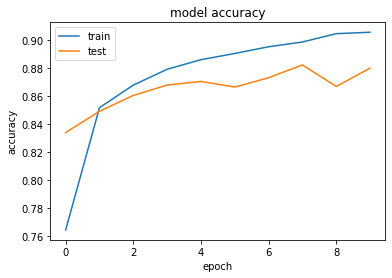

In [11]:
plt.plot(MODEL.history['accuracy'])
plt.plot(MODEL.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()